# P P2. Clasificación
## Luis Enrique Garcia Gallegos
### **Matricula**: 649247
En este proyecto estarás trabajando con datos proporcionados por Kaggle, específicamente de la competencia “Spaceship Titanic” __[(https://www.kaggle.com/competitions/spaceship-titanic)](https://www.kaggle.com/competitions/spaceship-titanic)__. Si no tienes una cuenta, deberás registrarte (te recomiendo usar tu correo institucional y tu nombre completo). 
Desarrolla los siguientes puntos en una *Jupyter Notebook*, de forma que se genere un reporte fácilmente comprensible, intepretable y replicable, con información para el lector descrita en formato de markdown.

El objetivo de la competencia es predecir si un pasajero fue transportado a una dimensión alternativa durante la colisión del Spaceship Titanic con una anomalía del espacio-tiempo. Para ello, se nos ha proporcionado un conjunto de registros personales recuperados del sistema informático dañado de la nave. Se nos proporcionaron 3 archivos `csv`.
La base de datos (`train.csv`) tiene las siguientes variables:
* `PassengerId`. Un identificador único para cada pasajero. Cada ID tiene el formato `gggg_pp`, donde `gggg` indica el grupo con el que viaja el pasajero y `pp` es su número dentro del grupo. Las personas en un grupo suelen ser miembros de una misma familia, aunque no siempre.
* `HomePlanet`. El planeta del que partió el pasajero, generalmente su planeta de residencia permanente.
* `CryoSleep`. Indica si el pasajero optó por ser puesto en animación suspendida durante el viaje. Los pasajeros en criosueño permanecen confinados en sus cabinas.
* `Cabin`. El número de cabina en la que se hospeda el pasajero. Tiene el formato `deck/num/side`, donde `deck` es la cubierta, `num` es el número de la cabina y `side` indica el lado del barco, que puede ser `P` (babor) o `S` (estribor).
* `Destination`. El planeta al que el pasajero desembarcará.
* `Age`. La edad del pasajero.
* `VIP`. Indica si el pasajero pagó por un servicio VIP especial durante el viaje.
* `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa` y `VRDeck`. Cantidad que el pasajero ha gastado en cada una de las diferentes instalaciones de lujo del Spaceship Titanic.
* `Name`. El nombre y apellido del pasajero.
* `Transported`. Indica si el pasajero fue transportado a otra dimensión. Esta es la variable objetivo que se intenta **predecir**.

La base de datos (`test.csv`) tiene las siguientes variables:
* `PassengerId`. Un identificador único para cada pasajero. Cada ID tiene el formato `gggg_pp`, donde `gggg` indica el grupo con el que viaja el pasajero y `pp` es su número dentro del grupo. Las personas en un grupo suelen ser miembros de una misma familia, aunque no siempre.
* `HomePlanet`. El planeta del que partió el pasajero, generalmente su planeta de residencia permanente.
* `CryoSleep`. Indica si el pasajero optó por ser puesto en animación suspendida durante el viaje. Los pasajeros en criosueño permanecen confinados en sus cabinas.
* `Cabin`. El número de cabina en la que se hospeda el pasajero. Tiene el formato `deck/num/side`, donde `deck` es la cubierta, `num` es el número de la cabina y `side` indica el lado del barco, que puede ser `P` (babor) o `S` (estribor).
* `Destination`. El planeta al que el pasajero desembarcará.
* `Age`. La edad del pasajero.
* `VIP`. Indica si el pasajero pagó por un servicio VIP especial durante el viaje.
* `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa` y `VRDeck`. Cantidad que el pasajero ha gastado en cada una de las diferentes instalaciones de lujo del Spaceship Titanic.
* `Name`. El nombre y apellido del pasajero.

La base de datos (`sample_submission.csv`) tiene las siguientes variables:
* `PassengerId`. Un identificador único para cada pasajero. Cada ID tiene el formato `gggg_pp`, donde `gggg` indica el grupo con el que viaja el pasajero y `pp` es su número dentro del grupo. Las personas en un grupo suelen ser miembros de una misma familia, aunque no siempre.
* `Transported`. Indica si el pasajero fue transportado a otra dimensión. Esta es la variable objetivo que se intenta **predecir**.

(`sample_submission.csv`) es en realidad el formato de como se debe de subir las predicciones.

1. Importa los datos de entrenamiento a tu ambiente de trabajo. Explora los datos: revisa si se cuenta con variables cualitativas y/o cuantitativas, si se tienen huecos, la cantidad de variables que se tiene, etc. No necesitas hacer una limpieza o preprocesamiento de la base de datos, pero puedes hacerlo si así lo deseas. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as st
import mlxtend.feature_selection as mlx
import random
from math import sqrt
from sklearn.model_selection import cross_val_score, LeaveOneOut, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
entrenamiento=pd.read_csv('train.csv')
prueba=pd.read_csv('test.csv')
entrenamiento=entrenamiento.fillna({'RoomService': entrenamiento['RoomService'].mean(), 'FoodCourt': entrenamiento['FoodCourt'].mean(), 'ShoppingMall': entrenamiento['ShoppingMall'].mean(), 'Spa': entrenamiento['Spa'].mean(), 'VRDeck': entrenamiento['VRDeck'].mean(), 'Age': entrenamiento['Age'].mean()})
prueba=prueba.fillna({'RoomService': prueba['RoomService'].mean(), 'FoodCourt': prueba['FoodCourt'].mean(), 'ShoppingMall': prueba['ShoppingMall'].mean(), 'Spa': prueba['Spa'].mean(), 'VRDeck': prueba['VRDeck'].mean(), 'Age': prueba['Age'].mean()})
entrenamiento=entrenamiento.round({'Age': 0, 'RoomService': 0, 'FoodCourt': 0, 'ShoppingMall': 0, 'Spa': 0, 'VRDeck': 0})
prueba=prueba.round({'Age': 0, 'RoomService': 0, 'FoodCourt': 0, 'ShoppingMall': 0, 'Spa': 0, 'VRDeck': 0})
entrenamiento=entrenamiento.round({'Age': 0, 'RoomService': 0, 'FoodCourt': 0, 'ShoppingMall': 0, 'Spa': 0, 'VRDeck': 0})
prueba=prueba.round({'Age': 0, 'RoomService': 0, 'FoodCourt': 0, 'ShoppingMall': 0, 'Spa': 0, 'VRDeck': 0})
entrenamiento=entrenamiento.fillna({'PassengerId': entrenamiento['PassengerId'].ffill(), 'HomePlanet': entrenamiento['HomePlanet'].ffill(), 'Cabin': entrenamiento['Cabin'].ffill(), 'Destination': entrenamiento['Destination'].ffill()})
prueba=prueba.fillna({'HomePlanet': entrenamiento['HomePlanet'].ffill(), 'Cabin': entrenamiento['Cabin'].ffill(), 'Destination': entrenamiento['Destination'].ffill()})
entrenamiento=entrenamiento.fillna({'CryoSleep': entrenamiento['CryoSleep'].mode()[0], 'VIP': entrenamiento['VIP'].mode()[0]})
prueba=prueba.fillna({'CryoSleep': entrenamiento['CryoSleep'].mode()[0], 'VIP': entrenamiento['VIP'].mode()[0]})
entrenamiento=entrenamiento.astype({'PassengerId': 'string', 'Cabin': 'string', 'HomePlanet': 'string'})
prueba=prueba.astype({'PassengerId': 'string', 'Cabin': 'string', 'HomePlanet': 'string'})
entrenamiento[['gggg', 'pp']]=entrenamiento['PassengerId'].str.split('_', expand=True)
prueba[['gggg', 'pp']]=prueba['PassengerId'].str.split('_', expand=True)
entrenamiento[['deck', 'num', 'side']]=entrenamiento['Cabin'].str.split('/', expand=True)
prueba[['deck', 'num', 'side']]=prueba['Cabin'].str.split('/', expand=True)
entrenamiento=entrenamiento.astype({'pp': 'int64', 'gggg': 'int64', 'num': 'int64'})
prueba=prueba.astype({'pp': 'int64', 'gggg': 'int64', 'num': 'int64'})
entrenamiento=pd.get_dummies(entrenamiento, columns=['HomePlanet', 'Destination', 'deck'], drop_first=True)
prueba=pd.get_dummies(prueba, columns=['HomePlanet', 'Destination', 'deck'], drop_first=True)
entrenamiento['S']=OneHotEncoder(drop='first', sparse_output=False).fit_transform(entrenamiento[['side']])[:, 0]
prueba['S']=OneHotEncoder(drop='first', sparse_output=False).fit_transform(prueba[['side']])[:, 0]
common_cols=['gggg', 'pp']
entrenamiento=entrenamiento.drop(columns=['PassengerId', 'Cabin', 'Name', 'side'])
ids=prueba['PassengerId']
prueba=prueba.drop(columns=['PassengerId', 'Cabin', 'Name', 'side'])
xtrain=entrenamiento.drop('Transported', axis=1)
ytrain=entrenamiento['Transported']

C:\Users\LEGG1234567890\AppData\Local\Temp\ipykernel_29664\745420444.py:26: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  entrenamiento=entrenamiento.fillna({'CryoSleep': entrenamiento['CryoSleep'].mode()[0], 'VIP': entrenamiento['VIP'].mode()[0]})
C:\Users\LEGG1234567890\AppData\Local\Temp\ipykernel_29664\745420444.py:27: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  prueba=prueba.fillna({'CryoSleep': entrenamiento['CryoSleep'].mode()[0], 'VIP': entrenamiento['VIP'].mode()[0]})


Al revisar la base de entrenamiento y prueba con ayuda de la extension de VisualCode [Data Wrangler](https://marketplace.visualstudio.com/items?itemName=ms-toolsai.datawrangler), la cual también tiene la implementación de Copilot, se hizo lo que se mencionara a continuación, se opto por la imputación de la base de entrenamiento y de prueba porque en la base de prueba debemos hacer, por lo que en variable cuantitativas (`Age`, `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa` y `VRDeck`) se opto por usar la media. Después se imputaron las variables cualitativas (`HomePlanet`, `Destination`, `deck` y `side`) las cuales se uso una forma que fue ver el dato anterior a este, pero esto fue porque si recordamos el `PassengerId` nos decía en que grupo pertenecía y si observamos la base de entrenamiento veremos que usualmente compartían espacio, por lo que tendría sentido suponer que tendrían mismos valores aunque no siempre fuera asi. Lo siguiente y ultimo fue separar `PassengerId` y `Cabin` para poder tener una mejor visualización de como se comportan los datos, en el caso de `PassengerId` pasamos del formato `gggg_pp` a dos columnas `gggg` y `pp`, no obstante en una variable guardaremos el `PassengerId` como estaba porque esto nos permitirá subir nuestras predicciones a la plataforma, mientras que para `Cabin` se hizo un proceso similar pasamos de `deck/num/side` a tres columnas `deck`, `num` y `side`. Como tenemos variable cualitativas (`HomePlanet`, `Destination`, `deck` y `side`) entonces tendremos que hacer *dummies* a `HomePlanet`, `Destination` y `deck` ya que no sabemos en cuantas clases tienen y para `side` se uso `OneHotEncoder`  debido a que unicamente se cuanta con `S` y `P`. Esto se hizo tanto en los datos de entrenamiento como en los que haríamos con las perdiciones.

2. Genera un modelo de regresión logística multinomial y evalúa la calidad del método usando alguna forma de validación cruzada.

In [4]:
modeloLR=LogisticRegression(solver='newton-cg', penalty='l2', max_iter=1000)
scoresLR=cross_val_score(modeloLR, xtrain, ytrain, cv=10, scoring='accuracy')
modeloLR.fit(xtrain, ytrain)
prediccionesLR=modeloLR.predict(prueba)
print(f'Regresión Logística - Exactitud promedio: {100*scoresLR.mean():.2f}%\tDesviación estándar: {scoresLR.std():.4f}')
datosLR=pd.DataFrame({'PassengerId': ids, 'Transported': prediccionesLR})
datosLR.to_csv('submitLR.csv', index=False)
print("=== Resumen del Modelo ===")
print(f"Intercepto (bias): {modeloLR.intercept_}")
print(f"Coeficientes de cada variable: {modeloLR.coef_}")

Regresión Logística - Exactitud promedio: 78.97%	Desviación estándar: 0.0160
=== Resumen del Modelo ===
Intercepto (bias): [-0.48000331]
Coeficientes de cada variable: [[ 1.34226503e+00 -8.68201661e-03 -3.18240866e-01 -1.52027359e-03
   5.05958708e-04  5.23142748e-04 -2.00692323e-03 -1.90457400e-03
   2.88694433e-05  3.00317266e-02  2.56649854e-05  1.54085828e+00
   5.82857765e-01 -4.07354984e-01 -4.39860398e-01  1.07726252e+00
   2.07256445e+00  4.36661665e-01 -2.97133108e-02  5.59840868e-01
   1.57799184e-01 -8.84021898e-02  5.81217677e-01]]


No se realizo una regresión logística multinomial porque solamente intentamos predecir `True` o `False` por lo que unicamente haremos una regresión logística y para medir la calidad de nuestro modelo lo haremos mediante validación cruzada de `10` que es lo más común cuando se trata de ver que tan bueno es pero sin la necesidad de exagerar, veremos cual es su accuracy, después haremos nuestras predicciones y las uniremos con `PassengerId` que guardamos previamente para poder verificar el accuracy de las predicciones en la competencia. Este proceso sera el mismo para todos los modelos que se harán más adelante. Con ayuda de ChatGPt podremos ver un pequeño summary de nuestro modelo.
<figure>
    <center> <img src="LR.jpeg" ></center>
</figure>

3. Genera un modelo de LDA, evalúa la calidad del método usando alguna forma de validación cruzada, y compara los resultados con la metodología anterior. 

In [5]:
modeloLDA=LinearDiscriminantAnalysis()
scoresLDA=cross_val_score(modeloLDA, xtrain, ytrain, cv=10, scoring='accuracy')
modeloLDA.fit(xtrain, ytrain)
prediccionesLDA=modeloLDA.predict(prueba)
print(f'LDA - Exactitud promedio: {100*scoresLDA.mean():.2f}%\tDesviación estándar: {scoresLDA.std():.4f}')
datosLDA=pd.DataFrame({'PassengerId': ids, 'Transported': prediccionesLDA})
datosLDA.to_csv('submitLDA.csv', index=False)
import numpy as np
print("=== Resumen del Modelo LDA ===")
print(f"Número de clases: {len(modeloLDA.classes_)}")
print(f"Clases: {modeloLDA.classes_}")
print(f"Medias de cada clase:\n{modeloLDA.means_}")
print(f"Coeficientes:\n{modeloLDA.coef_}")
print(f"Varianza explicada por cada discriminante:\n{modeloLDA.explained_variance_ratio_}")
print(f"Precisión media del modelo: {np.mean(scoresLDA):.4f}")

LDA - Exactitud promedio: 76.88%	Desviación estándar: 0.0155
=== Resumen del Modelo LDA ===
Número de clases: 2
Clases: [False  True]
Medias de cada clase:
[[1.28389340e-01 2.99038239e+01 2.85052144e-02 3.85535342e+02
  3.84083430e+02 1.67706373e+02 5.58980301e+02 5.38652607e+02
  4.57557242e+03 1.44727694e+00 6.23045423e+02 1.71958285e-01
  1.98609502e-01 9.40903824e-02 7.39281576e-01 5.02896871e-02
  5.72421784e-02 6.37311703e-02 1.32792584e-01 3.70104287e-01
  2.94090382e-01 9.26998841e-04 4.51448436e-01]
 [5.67153952e-01 2.77745546e+01 1.73595249e-02 6.61674280e+01
  5.31002969e+02 1.79678164e+02 6.68579260e+01 7.44275925e+01
  4.69037483e+03 1.58725445e+00 5.74687757e+02 3.27775240e-01
  2.14481498e-01 9.36500685e-02 6.50296939e-01 1.33851074e-01
  1.18090452e-01 4.79671083e-02 7.40063956e-02 2.85518502e-01
  3.09958885e-01 2.28414801e-04 5.54591138e-01]]
Coeficientes:
[[ 2.36098600e+00 -1.38957576e-02 -2.39117398e-01 -7.39782583e-04
   2.67733293e-04  4.91737043e-04 -5.39288996e-

Ahora probaremos con un modelo de `Linear Discriminant Analysis ` (LDA). De primera instancia nos podemos dar cuenta la exactitud de ambos modelos es ligeramente distinta teniendo a la regresión logística por encima de la LDA y si vemos el accuracy en la competencia nos daremos cuenta que claramente este es distinto por lo que hasta ahorita el mejor modelo es la regression logística. Con ayuda de ChatGPt podremos ver un pequeño summary de nuestro modelo. 
<figure>
    <center> <img src="LDA.jpeg" ></center>
</figure>

4. Genera un modelo de árbol de decisión, evalúa la calidad del método usando alguna forma de validación cruzada, y compara los resultados con las metodologías anteriores. 

Mejor α encontrado: 0.011111111111111112
Árbol de Decisión - Exactitud promedio: 76.71%	Desviación estándar: 0.0205


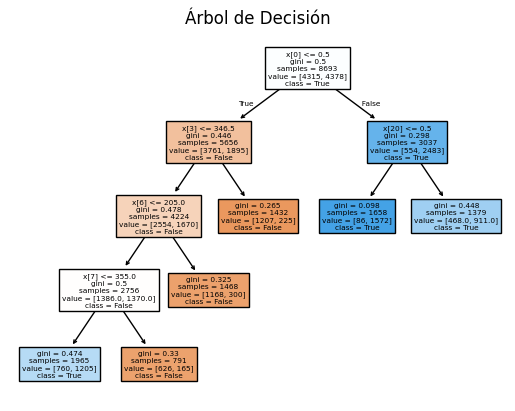

In [6]:
arbol_base=DecisionTreeClassifier(random_state=42)
arbol_base.fit(xtrain, ytrain)
param_grid={'ccp_alpha': np.linspace(0, 0.1, 10)}
grid_search=GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='accuracy')
grid_search.fit(xtrain, ytrain)
best_alpha=grid_search.best_params_['ccp_alpha']
print(f"Mejor α encontrado: {best_alpha}")
modeloTree=DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
scoresTree=cross_val_score(modeloTree, xtrain, ytrain, cv=10, scoring='accuracy')
modeloTree.fit(xtrain, ytrain)
prediccionesTree=modeloTree.predict(prueba)
print(f'Árbol de Decisión - Exactitud promedio: {100*scoresTree.mean():.2f}%\tDesviación estándar: {scoresTree.std():.4f}')
datosTree=pd.DataFrame({'PassengerId': ids, 'Transported': prediccionesTree})
datosTree.to_csv('submitTree.csv', index=False)
plot_tree(modeloTree, filled=True, class_names=np.unique(ytrain).astype(str))
plt.title("Árbol de Decisión")
plt.show()

Ahora haremos un árbol de decisión sin embargo es importante podarlo para esto se probaran 10 valores distintos de $α$ y nos quedaremos con el que tenga el mejor accuracy, otro detalle importante es que para los siguientes modelos se decidió usar `random_state=42`, lo cual es para tener modelos reproducibles. Si lo comparamos con los demás modelo veremos que es el que tiene menor exactitud, sin embargo tuvo un mejor accuracy que la de LDA en la competencia.
<figure>
    <center> <img src="Tree.jpeg" ></center>
</figure>

5. Genera un modelo de bagging, random forest o boosting, evalúa la calidad del método usando alguna forma de validación cruzada, y compara los resultados con las metodología anteriores. Si así lo prefieres, puedes realizar una comparación general al final, en vez de ir comparando cada que se trabaja una metodología distinta. 

In [7]:
modeloBagging=BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=100, 
    random_state=42
)
scoresBagging=cross_val_score(modeloBagging, xtrain, ytrain, cv=10, scoring='accuracy')
modeloBagging.fit(xtrain, ytrain)
prediccionesBagging=modeloBagging.predict(prueba)
datosBagging=pd.DataFrame({'PassengerId': ids, 'Transported': prediccionesBagging})
datosBagging.to_csv('submitBagging.csv', index=False)
print(f'Bagging - Exactitud promedio: {100*scoresBagging.mean():.2f}%\tDesviación estándar: {scoresBagging.std():.4f}')
modeloRF=RandomForestClassifier(
    n_estimators=300, 
    random_state=42
)
scoresRF=cross_val_score(modeloRF, xtrain, ytrain, cv=10, scoring='accuracy')
modeloRF.fit(xtrain, ytrain)
prediccionesRF=modeloRF.predict(prueba)
print(f'Random Forest - Exactitud promedio: {100*scoresRF.mean():.2f}%\tDesviación estándar: {scoresRF.std():.4f}')
datosRF=pd.DataFrame({'PassengerId': ids, 'Transported': prediccionesRF})
datosRF.to_csv('submitRF.csv', index=False)
modeloBoosting=GradientBoostingClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    random_state=42
)
scoresBoosting =cross_val_score(modeloBoosting , xtrain, ytrain, cv=10, scoring='accuracy')
modeloBoosting.fit(xtrain, ytrain)
prediccionesBoosting=modeloBoosting.predict(prueba)
print(f'Gradient Boosting - Exactitud promedio: {100*scoresBoosting.mean():.2f}%\tDesviación estándar: {scoresBoosting .std():.4f}')
datosBoosting=pd.DataFrame({'PassengerId': ids, 'Transported': prediccionesBoosting})
datosBoosting.to_csv('submitBoosting.csv', index=False)

Bagging - Exactitud promedio: 76.51%	Desviación estándar: 0.0445
Random Forest - Exactitud promedio: 77.96%	Desviación estándar: 0.0370
Gradient Boosting - Exactitud promedio: 76.80%	Desviación estándar: 0.0500


Decidí ejecutar los tres modelo de manera distinta por ejemplo para `Bagging` se uso arboles de decisión exactamente **100**. Para `Random Forest` se decidió usar **300**. Y para `Boosting` usamos **100** con una tasa de aprendizaje de `0.1`. Algo muy curioso es que `Boosting` es el modelo con las exactitudes más bajas pero su accuracy en la competencia fue el más alto.
<figure>
    <center> <img src="Bagging.jpeg" ></center>
<figure>
<figure>
    <center> <img src="RF.jpeg" ></center>
<figure>
<figure>
    <center> <img src="Boosting.jpeg" ></center>
</figure>

6. Selecciona o genera un nuevo modelo y úsalo para predecir la clase de los datos de prueba. La calidad de tu modelo se medirá exclusivamente con la métrica de exactitud (accuracy).

In [8]:
modelo=GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    subsample=0.8,
    max_features='sqrt',
    random_state=42
)
scores =cross_val_score(modelo , xtrain, ytrain, cv=10, scoring='accuracy')
modelo.fit(xtrain, ytrain)
predicciones=modelo.predict(prueba)
print(f'Nuevo modelo - Exactitud promedio: {100*scores.mean():.2f}%\tDesviación estándar: {scores .std():.4f}')
datos=pd.DataFrame({'PassengerId': ids, 'Transported': predicciones})
datos.to_csv('submit.csv', index=False)

Nuevo modelo - Exactitud promedio: 77.01%	Desviación estándar: 0.0482


Como `Boosting` fue el que alcanzo un mejor accuracy entonces empezaremos a cambiar sus parámetros ahora decidiremos que tanto queremos que crezcan los arboles de para empezar se escogió que cada árbol tuviera una profundidad maxima de 4 niveles, de los cuales en cada nodo habrá mínimo 10 muestras mientras que por hoja sera de 5 muestras. Se uso un $80%$ de los datos para entrenar a los arboles mientas que para las características de estos se uno la raíz de las variables que teníamos que serian 5 variables aproximadamente. Con esto mejoramos la exactitud de nuestro modelo a comparación del de Boosting, sin embargo en el accuary de la competencia este emperoro, por lo que posiblemente generamos sobreajuste.
<figure>
    <center> <img src="Modelo.jpeg" ></center>
<figure>

En la competencia logre la siguiente posición el dia 29 de Marzo de 2025.
<figure>
    <center> <img src="Top.jpeg" ></center>
<figure>

**Firma de Honor:** Doy mi palabra que he realizado esta actividad con integridad académica